In [16]:
import tensorflow as tf
import os

In [17]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:    
    tf.config.experimental.set_memory_growth(gpu, True)

In [18]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [19]:
data_dir='AI project/ImageClassification/data'
data_dir

'AI project/ImageClassification/data'

In [20]:
directories = os.listdir(data_dir)
directories = [d for d in directories if os.path.isdir(os.path.join(data_dir, d)) and not d.startswith('.')]
directories



['cats', 'dogs']

In [21]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [22]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image AI project/ImageClassification/data\cats\.ipynb_checkpoints
Issue with image AI project/ImageClassification/data\dogs\.ipynb_checkpoints


In [23]:
import numpy as np

In [24]:
data = tf.keras.utils.image_dataset_from_directory('AI project/ImageClassification/data')

Found 153 files belonging to 3 classes.


In [25]:
data_iterator = data.as_numpy_iterator()

In [26]:
batch = data_iterator.next()
batch

(array([[[[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          ...,
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ]],
 
         [[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          ...,
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ]],
 
         [[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          ...,
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ]],
 
         ...,
 
         [[255.      , 255.      , 255.      ],
          [255.   

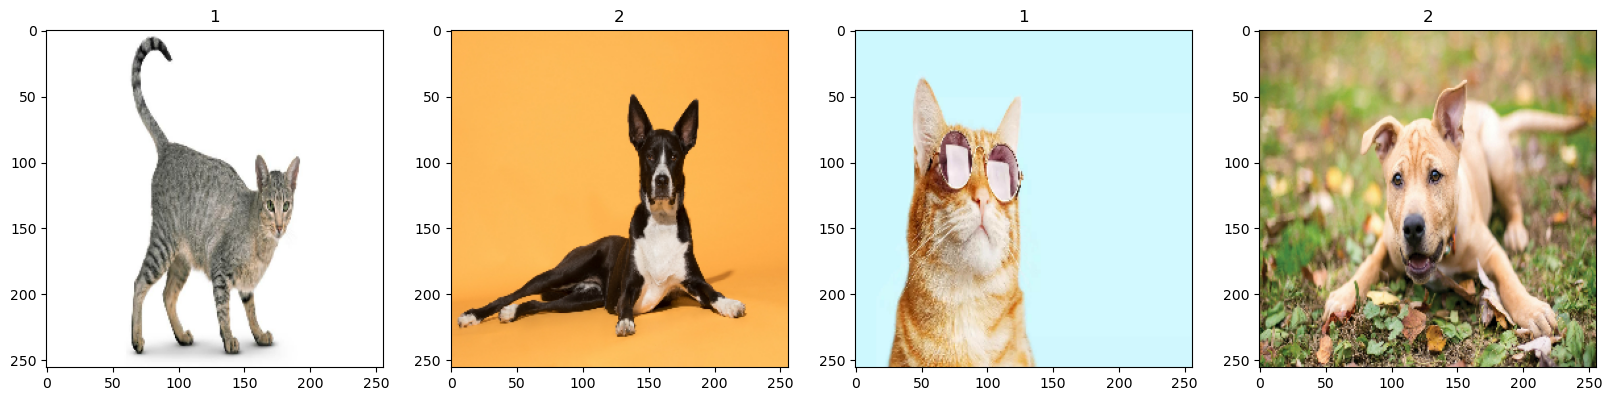

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [28]:
data = data.map(lambda x,y: (x/255, y))


In [29]:
data.as_numpy_iterator().next()[0].max()

1.0

In [30]:
len(data)

5

In [31]:

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [32]:
val_size

1

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [35]:

model = Sequential()

In [36]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile('adam', loss= tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [39]:
logdir='logs'

In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [41]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 5s 1s/step - loss: -7.2414 - accuracy: 0.4271 - val_loss: -34.6708 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 4s 1s/step - loss: -46.9048 - accuracy: 0.5417 - val_loss: -126.4228 - val_accuracy: 0.4688
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: -162.8282 - accuracy: 0.5417 - val_loss: -279.2023 - val_accuracy: 0.5625
Epoch 4/20
3/3 [==============================] - 4s 1s/step - loss: -400.6097 - accuracy: 0.5521 - val_loss: -834.3510 - val_accuracy: 0.4688
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: -922.7522 - accuracy: 0.5833 - val_loss: -1574.8757 - val_accuracy: 0.5625
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: -2052.7590 - accuracy: 0.5417 - val_loss: -2701.4810 - val_accuracy: 0.5938
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: -4356.7290 - accuracy: 0.5104 - val_loss: -5902.6421 - val_accuracy: 0.562

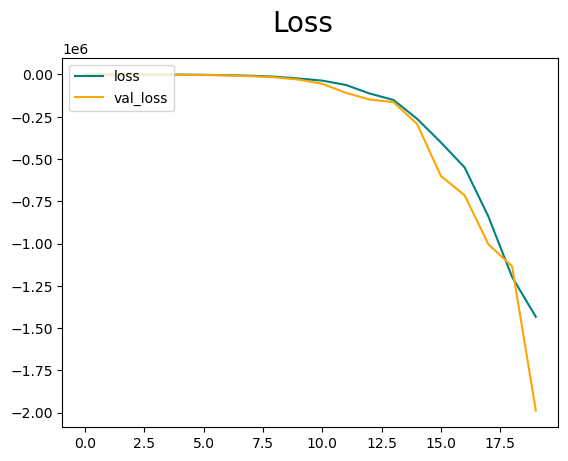

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

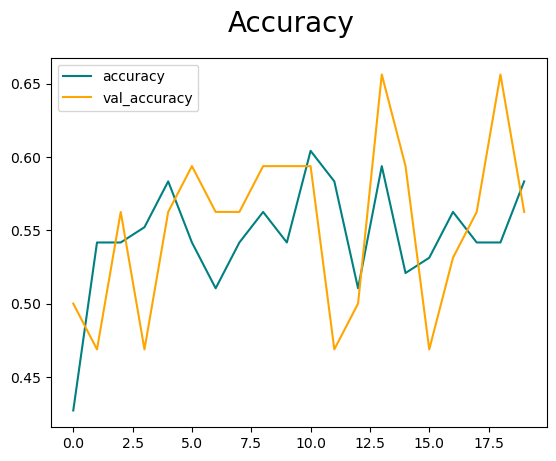

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()